For Tolerance of 0.001:
Jacobi Solution: [ 2.91025093 -2.49860332  7.00270238]
Jacobi Iterations: 4
Gauss-Seidel Solution: [ 2.91025093 -2.49860332  7.00270238]
Gauss-Siedel Iterations: 4



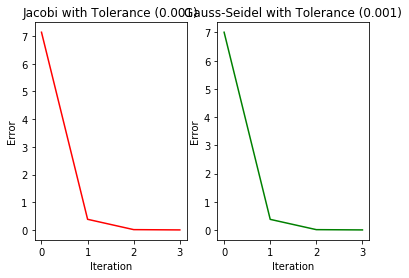

For Tolerance of 1e-06:
Jacobi Solution: [ 2.91022805 -2.49860092  7.00272114]
Jacobi Iterations: 7
Gauss-Seidel Solution: [ 2.91022805 -2.49860092  7.00272114]
Gauss-Siedel Iterations: 7



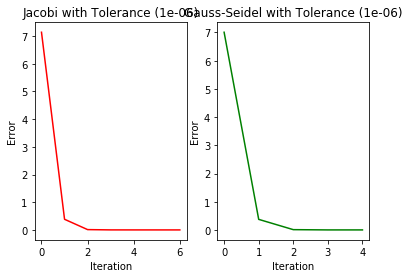

For Tolerance of 1e-09:
Jacobi Solution: [ 2.91022805 -2.49860092  7.00272114]
Jacobi Iterations: 9
Gauss-Seidel Solution: [ 2.91022805 -2.49860092  7.00272114]
Gauss-Siedel Iterations: 9



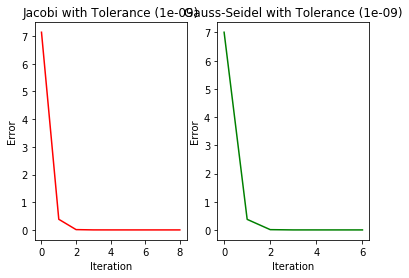

In [9]:
import numpy as np
import time
import matplotlib.pyplot as plt


# Jacobi method below-------------------------------------
def jacobi(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    errors = []
    
    for k in range(max_iterations):
        x_new = np.zeros_like(x)
        for i in range(n):
            s = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i][i]
            
        error = np.linalg.norm(x_new - x, ord=np.inf)
        errors.append(error)
        if error < tol:   # Error analysis, plot later
            return x_new, k + 1, errors 
        x = x_new
        
    return x, max_iterations, errors 


# Gauss-Siedel method below--------------------------------
def gauss_seidel(A, b, x0, tol, max_iterations):
    n = len(b)
    x = x0.copy()
    errors = []
    
    for k in range(max_iterations):
        x_new = x.copy()
        for i in range(n):
            s = sum(A[i][j] * x_new[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i][i]
            
        error = np.linalg.norm(x_new - x, ord=np.inf)
        errors.append(error)
        if error < tol:    # Error analysis, plot later
            return x_new, k + 1, errors
        x = x_new
        
    return x, max_iterations, errors


# Declare the system of equations (A and b)----------
A = np.array([[3, -0.1, -0.2],
              [0.1, 7, -0.3],
              [0.3, -0.2, 10]])
b = np.array([7.58, -19.3, 71.4], dtype=float)

x0 = np.zeros_like(b) # initial guess of [0,0,0]
tolerances = [1e-3, 1e-6, 1e-9] # 3 tolerances 
max_iterations = 100

# Comparisons of the number of iterations required by both methods to converge
# Plots of the error between the iterations for each method and tolerance
for tol in tolerances: 
    solution, iterations, errors = jacobi(A, b, x0, tol, max_iterations)
    solution2, iterations2, errors2 = gauss_seidel(A, b, x0, tol, max_iterations)
    
    print(f"For Tolerance of {tol}:")
    print(f"Jacobi Solution: {solution}")
    print(f"Jacobi Iterations: {iterations}")

    print(f"Gauss-Seidel Solution: {solution}")
    print(f"Gauss-Siedel Iterations: {iterations}\n")
    
    plt.subplot(1, 2, 1) # Jacobi plot
    plt.plot(range(len(errors)), errors, 'r')       
    plt.title(f"Jacobi with Tolerance ({tol})")
    plt.xlabel("Iteration")
    plt.ylabel("Error")

    plt.subplot(1, 2, 2) # Gauss-Siedel plot
    plt.plot(range(len(errors2)), errors2, 'g')    
    plt.title(f"Gauss-Seidel with Tolerance ({tol})")
    plt.xlabel("Iteration")
    plt.ylabel("Error")
    
    plt.show()

In [10]:
"""
Discussion of how tolerance affects the number of iterations needed for convergence:

As seen by the output, smaller tolerances require more iterations for convergence. 
(e. g. for 'Tolerance of 0.001', both methods only needed 4 iternations, but for a
'Tolerance of 1e-09', both methods needed 9 iterations).

"""

"\nDiscussion of how tolerance affects the number of iterations needed for convergence:\n\nAs seen by the output, smaller tolerances require more iterations for convergence. \n(e. g. for 'Tolerance of 0.001', both methods only needed 4 iternations, but for a\n'Tolerance of 1e-09', both methods needed 9 iterations).\n\n"